# Simple Linear Regression by Ordinary Least Square Method

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math


### Loading Data

In [ ]:
data = pd.read_csv('../input/predictingese/AttendanceMarksSA.csv')

In [ ]:
data.head()

In [ ]:
data.describe()

### Correlation Analysis

Correlation analysis is necessary to check the linearity between the input variables and output variable.

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [ ]:
X = data["MSE"]
y = data["ESE"]

sns.scatterplot(X,y)

### Preprocessing

* input vector - exog
* output vector - endog

by using **sm.add_constant** we can add constant unit vector in input features.

In [ ]:
endog = data['ESE']

exog = sm.add_constant(data[['MSE']])

print(exog.head())

In [ ]:
print(endog.head())

### Model Preparation

In [ ]:
model = sm.OLS(endog , exog)
results = model.fit()
print(results.summary())

### Calculating Residual Standard Error 

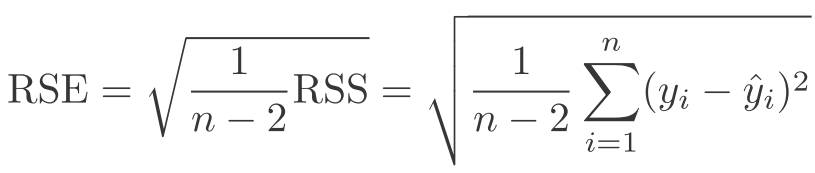

In [ ]:
def RSE(y_true , y_predicted):
    
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    
    RSS = np.sum(np.square(y_true-y_predicted))
    
    rse = math.sqrt( RSS / (len(y_true) - 2))
    
    return rse

In [ ]:
rse = RSE(data['ESE'],results.predict())
print(rse)

### Predicting Marks

In [ ]:
marks = 17
end_marks = results.predict([1,marks])
print(end_marks)

## 2. Model using Attendance as input feature

In [ ]:
X1 = data["Attendance"]
y1 = data["ESE"]

sns.scatterplot(X1 ,y1)


### Preprocessing

In [ ]:
endog1 = data['ESE']
exog1 = sm.add_constant(data[['Attendance']])
print(exog1.head(),end="\n\n")
print(endog1.head())

### Model Preparation

In [ ]:
model1 = sm.OLS(endog1, exog1)
results1 = model1.fit()

### Calculating Residual Standard Error

In [ ]:
rse = RSE(data['Attendance'],results1.predict())
print(rse)

In [ ]:
print (results1.summary())

## Final Conclusion

1. * R - square value for model is 0.565 which is acceptable.
   * R - sqaure value for model1 is 0.012 which is very low , indicates weak or non-existene of linearity in Attendance and ESE.
  
  
2. * The values of t-statistics for y-intercept and slope are very high in model.
   * The values of t-statistics for slope is less than 1 in model1.
   
  
3. * The value of calculated RSE is 4.3 in model, which is acceptable.
   * The value of calculated RSE is 37 in model1, which is very high.

So Model with ***MSE*** as input feature is **better**.

Model with ***Attendance*** as input feature is **not acceptable**.